<a href="https://colab.research.google.com/github/basleal22/baslealwork/blob/main/computer_vision_with_CNN_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from tensorflow.keras.preprocessing.image import load_img
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

--2022-11-22 16:07:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.7MB/s    in 5.5s    

2022-11-22 16:07:16 (19.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
#unziping a downloaded file
zip_file=zipfile.ZipFile("pizza_steak.zip")
zip_file.extractall()
zip_file.close()

In [ ]:
#inspect our data(visualizing the data)
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f'there are {len(dirnames)} directories and {len(filenames)} fileimages in {dirpath}' )

there are 2 directories and 0 fileimages in pizza_steak
there are 2 directories and 0 fileimages in pizza_steak/train
there are 0 directories and 750 fileimages in pizza_steak/train/steak
there are 0 directories and 750 fileimages in pizza_steak/train/pizza
there are 2 directories and 0 fileimages in pizza_steak/test
there are 0 directories and 250 fileimages in pizza_steak/test/steak
there are 0 directories and 250 fileimages in pizza_steak/test/pizza


In [ ]:
#from tensorflow.keras.preprocessing.image import load_img
#pizza_steak="pizza_steak/train/"
#steak="pizza_steak/train/steak"
#pizza="pizza_steak/train/pizza"
#for i in range(0,len(os.listdir("pizza_steak/train/pizza"))):
#  plt.imshow(load_img(f"{os.path.join(pizza, os.listdir(pizza)[i])}"))
#  plt.show()


In [ ]:
num_steak_image_train= len(os.listdir("pizza_steak/train/steak"))
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


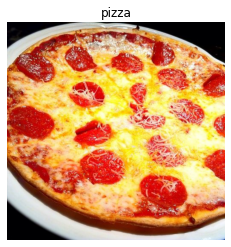

In [ ]:
img=view_random_image("pizza_steak/train/","pizza")

#import numpy as np


In [ ]:
img/255

array([[[0.00392157, 0.        , 0.03137255],
        [0.00392157, 0.        , 0.03137255],
        [0.00392157, 0.        , 0.03137255],
        ...,
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314]],

       [[0.00392157, 0.        , 0.03137255],
        [0.00392157, 0.        , 0.03137255],
        [0.00392157, 0.        , 0.03137255],
        ...,
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314]],

       [[0.00392157, 0.        , 0.03137255],
        [0.00392157, 0.        , 0.03137255],
        [0.00392157, 0.        , 0.03137255],
        ...,
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314]],

       ...,

       [[0.01176471, 0.01176471, 0.01960784],
        [0.00784314, 0.00784314, 0.01568627],
        [0.00784314, 0

In [ ]:
from IPython.testing import test
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
train_datagen=ImageDataGenerator(rescale=1/255)
valid_datagen=ImageDataGenerator(rescale=1/255)
train_dir= '/content/pizza_steak/train'
test_dir= '/content/pizza_steak/test'
train_data=train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
valid_data=valid_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)




Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
                           tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
                           tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history = model.fit(train_data,epochs=10,validation_data=valid_data)

Epoch 1/10
47/47 [==============================] - 22s 215ms/step - loss: 0.5735 - accuracy: 0.6940 - val_loss: 0.4377 - val_accuracy: 0.8100
Epoch 2/10
47/47 [==============================] - 10s 223ms/step - loss: 0.4491 - accuracy: 0.8020 - val_loss: 0.3878 - val_accuracy: 0.8320
Epoch 3/10
47/47 [==============================] - 9s 200ms/step - loss: 0.4079 - accuracy: 0.8220 - val_loss: 0.3242 - val_accuracy: 0.8700
Epoch 4/10
47/47 [==============================] - 9s 202ms/step - loss: 0.3670 - accuracy: 0.8453 - val_loss: 0.3003 - val_accuracy: 0.8780
Epoch 5/10
47/47 [==============================] - 10s 222ms/step - loss: 0.3184 - accuracy: 0.8713 - val_loss: 0.2918 - val_accuracy: 0.8900
Epoch 6/10
47/47 [==============================] - 9s 200ms/step - loss: 0.3048 - accuracy: 0.8687 - val_loss: 0.3311 - val_accuracy: 0.8520
Epoch 7/10
47/47 [==============================] - 9s 198ms/step - loss: 0.2734 - accuracy: 0.8907 - val_loss: 0.3391 - val_accuracy: 0.8560
Epo

In [ ]:
model.evaluate(train_data),model.evaluate(valid_data)

16/16 [==============================] - 2s 141ms/step - loss: 0.3756 - accuracy: 0.8540


([0.0682825967669487, 0.9800000190734863],
 [0.37555021047592163, 0.8539999723434448])

In [ ]:
train_dir="pizza_steak/train"
test_dir="pizza_steak/test"


preprocessing our data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)


Train your data

In [ ]:
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)
valid_data=test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            batch_size=32)


FileNotFoundError: ignored

In [ ]:
#images,labels=train_data.next()

In [ ]:
model_2=tf.keras.Sequential([tf.keras.layers.Conv2D(filters=10,
                                                    kernel_size=3,
                                                    strides=1,
                                                    padding="valid",
                                                    activation="relu",input_shape=(224,224,3)),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(1,activation="sigmoid")])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
history_2=model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data) )

Epoch 1/5
47/47 [==============================] - 11s 211ms/step - loss: 1.1073 - accuracy: 0.6840 - val_loss: 0.4316 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 10s 203ms/step - loss: 0.4482 - accuracy: 0.8047 - val_loss: 0.4396 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.3168 - accuracy: 0.8760 - val_loss: 0.4279 - val_accuracy: 0.7960
Epoch 4/5
28/47 [================>.............] - ETA: 3s - loss: 0.1776 - accuracy: 0.9342

KeyboardInterrupt: ignored

In [ ]:
model_2.evaluate(valid_data)

In [ ]:
import pandas as pd
pd.DataFrame(history_2.history).plot(figsize=(10,7))

In [ ]:
loss=history_2.history["loss"]
val_loss=history_2.history["val_loss"]
val_accuracy=history_2.history["val_accuracy"]
accuracy=history_2.history["accuracy"]
epochs=range(len(history_2.history["loss"]))
plt.plot(epochs,loss,label="training_loss")
plt.plot(epochs,val_loss,label="val_loss")
#plt.plot(epochs,accuracy,label="accuracy")
#plt.plot(epochs,val_accuracy,label="val_accuracy")

ways to induce overfitting
1. increase conv filters
2. increase conv layers
3. add another dense layer
ways to reduce overfitting
-add data augmentation
-add regularization layers
-add more data

In [ ]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True)
train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)


In [ ]:
from IPython.utils.tempdir import TemporaryWorkingDirectory
train_augmented_data=train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                 target_size=(224,224),
                                                                 class_mode="binary",
                                                                 batch_size=32,
                                                                 shuffle=True)

train_data=train_datagen.flow_from_directory(train_dir,
                                                 target_size=(224,224),
                                                 class_mode="binary",
                                                 batch_size=32,
                                             shuffle=True)
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                          target_size=(224,224),
                                          class_mode="binary",
                                         batch_size=32)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
imagess,labelss=train_data.next()
aug_images,aug_labels=train_augmented_data.next()

32 32
number 11


(-0.5, 223.5, 223.5, -0.5)

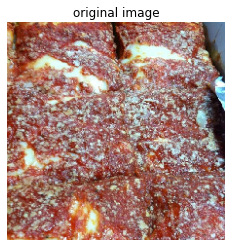

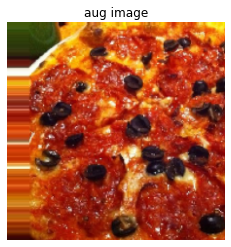

In [ ]:
number=11
print(len(imagess),len(aug_images))
print(f'number {number}')
plt.imshow(imagess[number])
plt.title(f'original image')
plt.axis(False)
plt.figure()
plt.imshow(aug_images[number])
plt.title(f'aug image')
plt.axis(False)



In [ ]:
model_3=tf.keras.Sequential([tf.keras.layers.Conv2D(filters=10,
                                                    kernel_size=3,
                                                    strides=1,
                                                    padding="valid",
                                                    activation="relu",input_shape=(224,224,3)),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Conv2D(10,3,activation="relu"),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(1,activation="sigmoid")])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
history_3=model_3.fit(train_augmented_data,epochs=5,steps_per_epoch=len(train_augmented_data),validation_data=test_data,validation_steps=len(test_data) )

Epoch 1/5
47/47 [==============================] - 26s 547ms/step - loss: 0.6450 - accuracy: 0.6067 - val_loss: 0.4732 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 24s 513ms/step - loss: 0.5060 - accuracy: 0.7560 - val_loss: 0.4549 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 26s 554ms/step - loss: 0.4898 - accuracy: 0.7647 - val_loss: 0.4129 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 24s 514ms/step - loss: 0.4842 - accuracy: 0.7687 - val_loss: 0.3349 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 24s 512ms/step - loss: 0.4339 - accuracy: 0.8027 - val_loss: 0.4628 - val_accuracy: 0.7980
